Lab 1 for Group C:

    Muhammad Hamas Khan
    Zain Amir Zaman
    Marc Benesch
    Asif Ibna Mustafa



### Download the assets folder required for this notebook from https://syncandshare.lrz.de/getlink/fiLmDyv8FXqFyN1X3hbhwazH/01-Realsense under Lecture
The file structure should all notebooks should be as follows
- Lecture/
   - NSx.ipynb
   - assets/
       - ....
       - ....

# NS1 - Introduction to Realsense and Depth Sensors

This notebook will give you an introduction to depth estimation and depth sensors. We will mainly concentrate on Intel RealSense D435(i) devices, as we are going to be using them during this project lab. By the end of this notebook, you will have a basic understanding of how RGB-D cameras work and we will explore some of the tools we can utilize.

This notebook is structured as follows:

1. Depth Estimation and Depth Sensors
    1.1 Time of Flight Sensors (ToF Sensors)  
    1.2 Stereo Depth Sensors  
2. Realsense D435(i): Tools and Setup  
    2.1 Realsense SDK (python/c++)  
        2.2 ROS Wrapper  
        2.3 Camera Parameters  
3. Stereo Reconstruction  
    3.1 Epipolar Line Search and Disparity  
4. D435(i) Calibration  


## 1 Depth Estimation and Depth Sensors

The goal of depth estimation is to estimate the distance of the objects related to the camera location. With no prior knowledge about the objects in the scene we cannot estimate this only from one monocular image. 

<br>

<figure style="text-align:center">
    <img src="assets/depth_sample_nyu.jpeg" />
    <figcaption > <b>Indoor Depth Image (from NYU dataset)</b> </figcaption>
</figure>

There are multiple approaches to estimate the depth, depending on which sensors are used in the process. Two examples of these approaches are the Time of Flight (ToF) sensors and the Stereo Depth sensors.

### 1.1 Time of Flight Sensors (ToF Sensors)

<br>

<figure style="text-align:center">
    <center> <img src="assets/PPHAU-Time-of-Flight-Sensors.png" /> </center>
    <figcaption > <b>ToF sensors</b></figcaption>
</figure>

ToF sensors estimate depth by measuring the time it takes for a light pulse to reflect off the target. An example to this type of sensor would be the <b/>Azure Kinect Sensor </b>.

### 1.2 Stereo Depth Sensors

<br>

<figure style="text-align:center">
    <center><img style="allignt:center" src="assets/stereo-ssd-1.png" /></center>
    <br>
    <figcaption > <b>Stereo Depth Reconstruction (image source https://www.intelrealsense.com/stereo-depth-vision-basics/)</b></figcaption>
</figure>

<br>

Stereo depth sensors use two infrared/color cameras located on the same baseline with a know distance between their centers. Then the depth is calculated through pixel/block matching using epipolar line search. An example for this sensor type is the Intel RealSense D435(i).

You can find more information about epipolar line search and depth calculation in stereo depth sensors under chapter 3.1 or in reference [8].

<br>

## 2 Realsense D435(i): Tools and Setup

During this lecture we will be using Intel RealSense D435(i) cameras as our main sensors. Therefore, it is helpful to have a basic understanding of how this sensor works and its limitations.

D435 is a stereo-depth camera whereas D435i is the same camera with an additional inertial measurement unit (IMU) sensor. They provide RGB, depth, and IMU data (only with D435i) of their view.

D435 and D435i sensors have stereo infrared depth sensor with static laser pattern for active stereo.


Sensor specification from the [Intel-RealSense-D400-Series-Datasheet](https://www.intel.com/content/dam/support/us/en/documents/emerging-technologies/intel-realsense-technology/Intel-RealSense-D400-Series-Datasheet.pdf):

* 1280x720 active stereo depth resolution
    * active here means with laser pattern emmiter we will revisit the role of the emmiter in the homework.
* 1920x1080 RGB resolution
* Depth Diagonal Field of View (FoV) over 90°
* Dual global shutter sensors for up to 90 FPS depth streaming
* Range 0.2m to over 10m (Varies with lighting conditions)
  * In our applications we keep this range from 0.4 to 2 meters
* D435i includes Inertial Measurement Unit (IMU) for 6 degrees of freedom (6DoF) data.


There are multiple [whitepapers](https://dev.intelrealsense.com/docs/whitepapers) available to show the performace and limitation of these sensors. You can chechk them if you are interested. We will not cover them in this project lab.

### 2.1 Realsense SDK (python/c++)

[Intel RealSense SDK](https://github.com/IntelRealSense/librealsense) (Software Development Kit) is a library for Intel RealSense depth cameras. It allows depth and color streaming and provides intrinsic and extrinsic calibration information. The SDK also allows more functionality, which you can check in the linked repository if you are interested.


We will use the SDK for the first notebook, homework, afterwards we will transition to using ROS Wrapper (sec. 2.2)

#### realsense-viewer

[realsense-viewer](https://github.com/IntelRealSense/librealsense/tree/master/tools/realsense-viewer) is a software that allows visualization, recording, and playing recorded sequences. It is useful for recording small sequences and experimenting with different post-processing filters.

We will use it for intrinsic and stereo-extrinsic calibration.

<br>

<figure style="text-align:center">
    <center><img src="assets/realsense-viewer.png" /> </center>
    <figcaption> <b>Realsense Viewer</b> </figcaption>
</figure>


We will look into calibration and post-processing filters in more detail later.

#### Setup

Installation instructions for realsense SDK and Viewer could be found in the [librealsense](https://github.com/IntelRealSense/librealsense) github repo.

### 2.2 ROS Wrapper

To be able to understand RealSense ROS Wrapper we need first have a quick introduction to Robot Operating System (ROS).

ROS is a set of software libraries and tools that were designed to build robot applications. We are mainly going to use ROS as our communication foundation for our recording system.

For more detailed information about ROS, you can check the official [ROS documentation](https://wiki.ros.org), or you can review our summary.

[Intel RealSense ROS wrapper](https://github.com/IntelRealSense/realsense-ros) is a ROS package which supports multiple applications like streaming color, depth, and point clouds in addition to other examples like SLAM (along with tracking sensors).<mark>This wrapper allows us to easily use RealSense devices within a ROS network.</mark>

<br>

<figure style="text-align:center">
    <img src="assets/rs-pointcloud-rviz.png" />
    <figcaption> <b>Rviz visualization of rs-pointcloud launch</b></figcaption>
</figure>    

<br>

We will mainly use rosbags to record ego-perspective, and multiview sequences.

#### Setup


In our system we are using [ROS Noetic](https://wiki.ros.org/noetic). The "desktop-full" version includes the packages that we need for ubuntu (https://github.com/IntelRealSense/realsense-ros) as pre-built packages.


If you want to install the ROS Wrapper for your system you need to use the following command.

```bash
apt install ros-noetic-realsense2-camera ros-noetic-realsense2-camera-dbgsym ros-noetic-realsense2-description
```

#### Ros messages

A quick explanation of ROS would be that every <b>node</b> (computer, sensor, etc.) is connected through a <b>ROS Master</b> (a computer), which acts as an information center. 

The nodes who want to send any type of messages (in our case: image, depth or motion data) publishes these to the ROS network. These are called <b>publisher nodes</b>.

And the nodes who want to receive (in our case the main computer that we are recording the data) these messages subscribe to these messages in real-time through the ROS Master.

These messages that are being published from the publisher nodes are organized under <b>topics</b>, and their naming structure is similar to a general folder sturucture. A few examples of the topics when we are reading data from a ROS Wrapper <b>rosbag</b> som of the important topics which are dependent to the [launch file](https://github.com/IntelRealSense/realsense-ros/tree/development/realsense2_camera/launch) would be:
* Color image:  `/camera/color/image_raw`, and the corresponding camera parameters are in `/camera/color/camera_info`
* Depth image: `/camera/aligned_depth_to_color/image_raw` and the corresponding camera parameters are in `/camera/aligned_depth_to_color/camera_info`
* Transformation data are published through `/tf` and `/tf_static`

### 2.3 Camera Parameters

The following parameters represent the unique physical model of a camera:

<br>

* $c_x, c_y$: the principal point coordinates: the center of projection
<br>

* $f$: focal length is the distance between the principal point and the image plane
<br>
* $f_x = \frac{f}{pixel\ width}$: focal length
<br>
* $f_y = \frac{f}{pixel\ height}$: focal length
<br>

* 3x3 Calibration matrix $K$: $$K = 
    \begin{bmatrix}
        f_x & 0 & c_x \\
       0 & f_y & c_y \\
       0 & 0 & 1 \end{bmatrix}$$
<br>

* 4x3 Camera extrinsics matrix $T=[R|t]$

$$ T = \begin{bmatrix}
r_{0,0} & r_{0,1} & r_{0,2} & t_0\\
r_{1,0} & r_{1,1} & r_{1,2} & t_1\\
r_{2,0} & r_{2,1} & r_{2,2} & t_2\\
\end{bmatrix}$$

<br>

* Distortion Model
Depending on lens shape the difference between real lens shape
D435i has "plumb bob"/"brown conrady" distortion model, which means it has two types of distortion [\[7\]](https://calib.io/blogs/knowledge-base/camera-models).
  * Radial Distortion: Since the lens has a circular shape
  * Tangential Distortion: The image seems tilted and stretched because different lens elements not beeing perfectly aligned, or because the optical axis is not perfectly normal to the sensor plane.

The images we get are <b> already undistorted </b> based on the previous distortion models.  


<figure style="text-align:center">
    <img src="assets/perspective_projection.png" />
    <figcaption > Pinhole camera and Perspective Projection </figcaption>
</figure>

<br>

Using these parameter we can model our camera with the following equation that projects 3D points into the camera plane:

<br>

$$pixels = K \times [R|t] \times Points$$


$$\begin{bmatrix}
u \\
v \\
1\end{bmatrix} = 
\begin{bmatrix} 
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
r_{0,0} & r_{0,1} & r_{0,2} & t_x \\
r_{1,0} & r_{1,1} & r_{1,2} & t_y\\
r_{2,0} & r_{2,1} & r_{2,2} & t_z\\
\end{bmatrix}
\begin{bmatrix}
x\\
y\\
z\\
1
\end {bmatrix}
$$

To show the effect of different camera parameters we will use pyrender library to render images from a camera while controlling its intrinsics.

In [ ]:
!pip install numpy matplotlib trimesh scipy pyrender

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh
import numpy as np
import pyrender
from scipy.spatial.transform import Rotation

# loading the sugar box model
# inspired by https://pyrender.readthedocs.io/en/latest/examples/quickstart.html
model_path = 'assets/004_sugar_box/textured.obj'
trimesh_model = trimesh.load(model_path)
model = pyrender.Mesh.from_trimesh(trimesh_model)
# create an empty scene in trimesh
scene = pyrender.Scene()
# set the object pose
object_pose = np.eye(4)
object_pose[:3,3] = [0,0,2]
# add the object to the scene
scene.add(model)
# set the camera intrinsics and extrinsics
camera = pyrender.IntrinsicsCamera(fx=640, fy=640, cx=200, cy=200)
camera_pose = np.eye(4)
camera_pose[:3,3] = [0.3, 0.0, 0.35]
camera_pose[:3,:3] = Rotation.from_euler('xyz', [45, 0, 90],degrees=True).as_matrix()
# add the camera to the scene
scene.add(camera, pose=camera_pose)
# create a spot light (required for rendering)
light = pyrender.SpotLight(color=np.ones(3), intensity=50.0,
                                innerConeAngle=np.pi/16.0,
                                outerConeAngle=np.pi/6.0)
# add the light to the scene
scene.add(light, pose=camera_pose)


# we will use ipywidgets to interact with the scene
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# The camera update callback will trigger everytime one of the camera parameters are changed by the user
def update_camera(f:float, mx:int,my:int,cx:float, cy:float, height:int,width: int):
    global camera
    fx = f/mx
    fy = f/my
    camera.fx = fx
    camera.fy = fy
    camera.cx = cx
    camera.cy = cy
    
    r = pyrender.OffscreenRenderer(width,height)
    color, depth = r.render(scene)
    plt.figure()
    plt.subplot(1,2,1)
    # plt.axis('off')
    plt.imshow(color)
    plt.title('color')
    plt.subplot(1,2,2)
    # plt.axis('off')
    plt.imshow(depth, cmap=plt.cm.gray_r)
    plt.title('depth');
    

# create the gui buttons, sliders and connect them to the `update_camera` callback
interact(update_camera, f=widgets.FloatSlider(value=400, min=-2000, max=2000, step=0.01),
                        mx=widgets.FloatSlider(value=1, min=0.1, max=100,step=0.01),
                        my=widgets.FloatSlider(value=1, min=0.1, max=100,step=0.01),
                        cx=widgets.FloatText(value=320),
                        cy=widgets.FloatText(value=240),
                        height=widgets.FloatText(value=480),
                        width=widgets.FloatText(value=640));

## 3 Stereo Reconstruction

Stereo reconstruction is the process of converting a pair of stereo images to the to another piece of information, like depth. The correspondance matching between the stereo images is done by the epipolar line search.

<br>

<figure style="text-align:center">
    <img src="assets/realsense-stereo.png" width=70% height=70% />
    <br>
    <figcaption > <b>Stereo Reconstruction and Disparity Map</b> </figcaption>
</figure>

### 3.1 Epipolar Line Search and Disparity

* Our goal is to find the matching pixels from left and right image. If we know this, we could use triangles similarity to estimate the depth.
* The projection ray $C_{left}-P$ is a line on the right image plane called the epipolar line ($P_{right}, e_{right}$). 
* The intersection of the baeline and the image plane is called an epipole $e_{left}, e_{right}$
* This can be shown in the figure below
<figure style="text-align:center">
    <img src="assets/EpipolarLineSearch.png" />
    <br>
    <figcaption > <b>Epipolar Line Search</b> </figcaption>
</figure>

<br>

* This means in order to find the matching pixel  for $P$ on the right view we only need to search on the Epipolar line corresponding to the ray $C_{left}-P$.

* In other words, the epipolar constraints will reduce the search space for us to find matching pixels.

* If the relative transformation between both views is only a horizontal displacement (i.e. cameras are alinged to the same basline). Then the the projection of $C_{left}-P$ to the right view view will be on the same row of pixels as in the left image (the epipoles will be in infinity because the baseline will be parallel to the pixels row).

* In practice the relative cameras are not exactly alligned on the same baseline, but have a sligt rotation. Therefore, the process of projecting the image view into a view alligned with the baseline is known as rectification.

* Note: In realsense the ros-topics rectified image topics has the suffix `_rect_raw`




<!-- <figure style="text-align:center">
    <img src="assets/realsense-stereo.png" />
    <br>
    <figcaption > <b>(https://dev.intelrealsense.com/docs/stereo-depth-cameras-for-phones)</b> </figcaption>
</figure> -->

## 4 D435(i) Calibration

Camera calibration is the process of calculating the true parameters, i.e. intrinsic, extrinsic and lens distortion properties, of the camera. After calibration it is possible to extract 3D information from the 2D images.

We will calibrate and therefore optimize a subset of the sensor parameters to enhance the depth estimation. Realsense SDK provides `realsense-viewer` and `dynamic calibration tool` for calibration. We will not cover calibration with these tools in this course.

With `realsense-viewer` we can calibrate the following:

* On Chip Calibration (stereo camera extrinsics)
* Focal length Calibration (focal length)
* Tare Calibration (stereo camera extrinsics)

For more details check reference [\[9\]](https://dev.intelrealsense.com/docs/intel-realsensetm-d400-series-calibration-tools-user-guide).

# Homework
### Note: Data for tasks 1 and 2 could be found in this link https://syncandshare.lrz.de/getlink/fiLmDyv8FXqFyN1X3hbhwazH/01-Realsense under Homework



### 1. Stereo Reconstruction and laser-pattern (workload 1 student):
In this exercise, we will have a look over the 
1. Read the color, infrared1, infrared2 images in the folder Homework/HW-1-data (images with numbers (1262, 1755, 1131, 0000))
2. Use OpenCV Stereo Block Matching to find the disparity map, then use the equation for depth to calculate the estimated depth map. You could assume that (focal_length=970 mm, baseline=50 mm) 
3. Use OpenCV to visualize the reconstructed depth image along with the infrared images using `cv2.imshow`.
A sample reconstruction could be seen in the image below.
![image](assets/hw1-1-example.png)
4. What is the difference between the depth quality with respect to 
     1. planes with texture (Checkerboard) vs. planes without texture (the PC case)
     2. with laser pattern (1262,1755) vs no laser-pattern (0000,1131) 

### 2. Object Twin (workload 3 students):
In this exercise, we will load a realsense-viewer rosbag recording, then use opencv and pyrender to create a twin of a moving checkerboard.
1. Loading color and depth data:
     * Use pyrealsense2 to read the bagfile and acquire color, depth, aligned depth to color, color camera intrinsics, depth camera intrinsics. (Show the images in a loop using `cv2.imshow`)
     
2. Checkerboard detection and tracking: 
     * The checkerboard has a `6x9` pattern where each square has an edge length of 4 cm.
     * Using opencv we want Find its corners (use `cv2.findChessboardCorners`, and `cv2.cornersSubPix`). then use `cv2.drawChessboardCorners` to overlay the detections on the colored image
     * From the previous step, you will have 2D/3D correspondences for the corners. Use `cv2.solvePnP` to estimate the object to camera translation and rotation vectors.
     * *Extra:* Use opencv drawing utils and perspective projection function to draw a 3D axis, and a cropping mask for the board. Useful functions here could be `cv2.line,cv2.projectPoints,cv2.fillPoly`.
3. Modeling the checkerboard in pyrender:
    * Using pyrender create a scene with camera and a `Box` mesh corresponding to the checkerboard.
    * Notes:
      1. You will need to scale the box and shift its center to match the checkerboard 3d coordinate system in opencv
      2. To convert from opencv camera to pyrender camera in you system you may need to rotate your objects by 90 degees around the X-axis (depending on your implementation) 
4. Visualization and Comparasion:
    * In the loop, update the mesh pose with the updated pose of the checkerboard
    * Compare the rendered depth value to the actual algined_depth values we got from realsense.
    * Optional: Report the Root Mean Squared Error RMSE between the rendered depth, and the actual depth within the detected area
a sample visualization could be seen in the figuire below
![image](assets/hw-1-2-example.png)

### Homework 1 - Solutions

In [ ]:
!pip install opencv-python

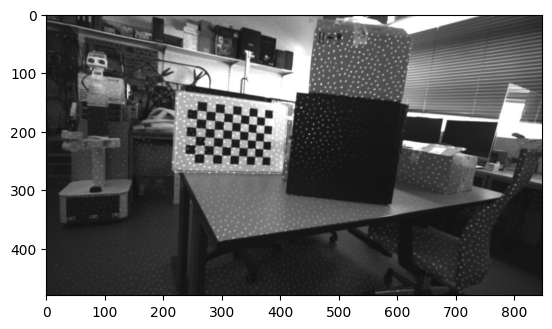

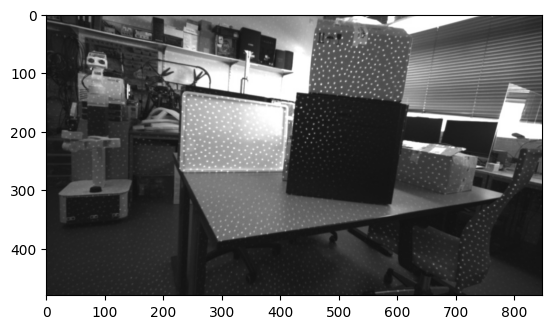

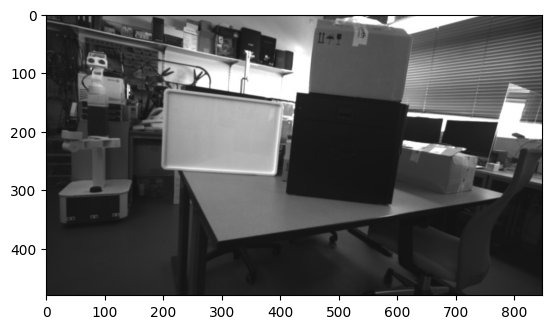

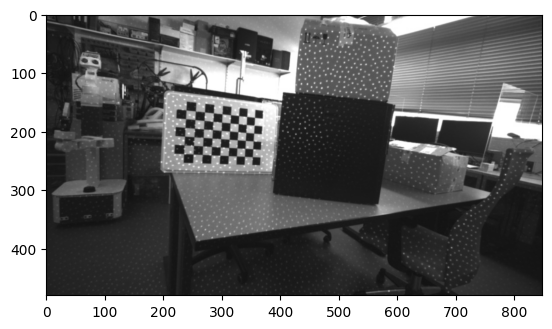

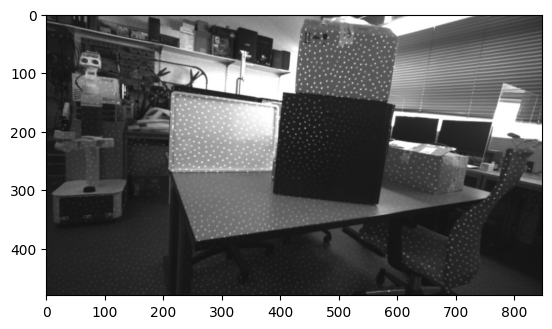

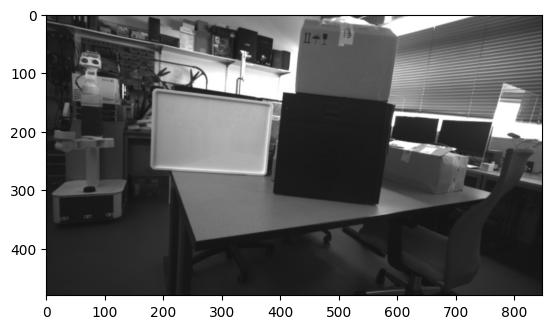

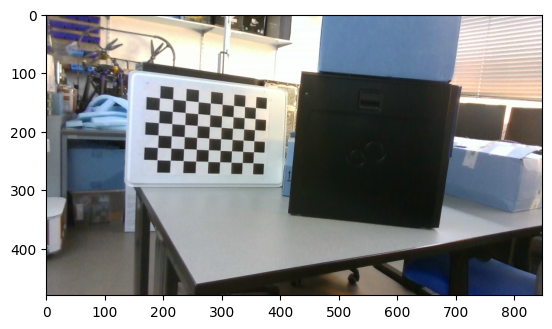

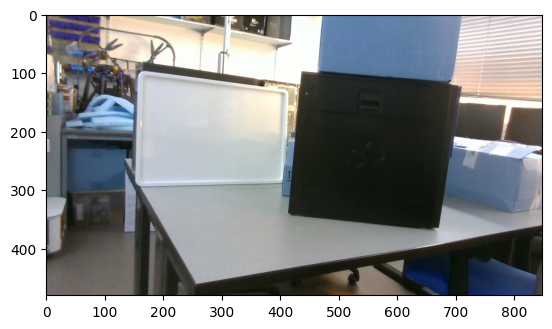

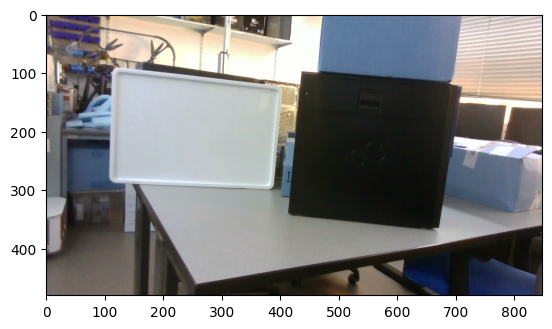

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import trimesh
import pyrender
from scipy.spatial.transform import Rotation



path = "HW1.1-data"

image_filenames = [
    "infra1_1262.jpg", "infra1_1755.jpg", "infra1_0000.jpg",
    "infra2_1262.jpg", "infra2_1755.jpg", "infra2_0000.jpg",
    "color1262.jpg", "color1755.jpg", "color0000.jpg",
]

for img in image_filenames:
    img_path = os.path.join(path, img)
    img_arr = cv2.imread(img_path)
    plt.imshow(img_arr)
    plt.show()

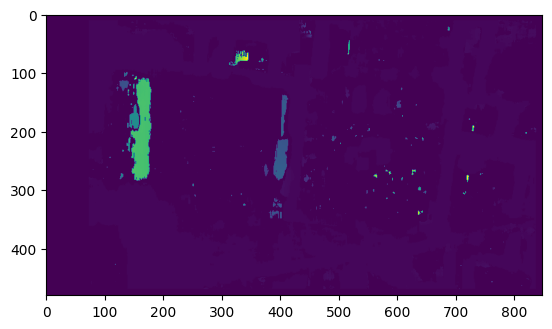

[[-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]
 [-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]
 [-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]
 ...
 [-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]
 [-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]
 [-3031.25 -3031.25 -3031.25 ... -3031.25 -3031.25 -3031.25]]


/tmp/ipykernel_49797/3370530756.py:19: RuntimeWarning: divide by zero encountered in divide
  depth = (baseline * focal_length) / disparity


In [ ]:
imgL, imgR = cv2.imread("HW1.1-data/color1755.jpg"), cv2.imread("HW1.1-data/color0000.jpg")

baseline = 50 # mm
focal_length = 970 # mm

grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoBM_create()

disparity = stereo.compute(grayL, grayR)

plt.imshow(disparity)
plt.show()

depth = (baseline * focal_length) / disparity
print(depth)

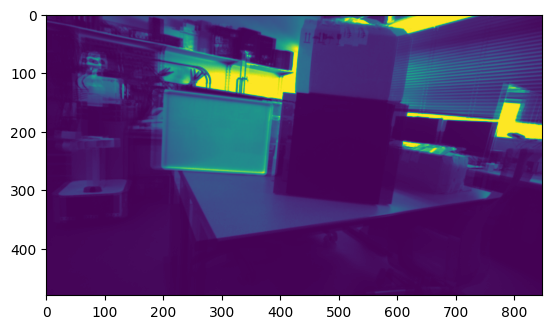

In [ ]:
left_infrared = cv2.imread("HW1.1-data/infra1_0000.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
right_infrared = cv2.imread("HW1.1-data/infra2_0000.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
color_img = cv2.imread("HW1.1-data/color0000.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
depth_map = depth.astype(np.float32)

composite = cv2.multiply(left_infrared, right_infrared, depth_map)
depth_map_norm = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

color_depth_map = np.hstack((color_img, depth_map_norm))

infrared_map = np.hstack((right_infrared, left_infrared))

cv2.imshow('Color-Depth Map and Infrared Images', np.vstack((color_depth_map, infrared_map)))
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(composite)
plt.show()

#### 4.)
Planes with texture, such as a checkerboard pattern, can provide more features or points for stereo matching algorithms to use, resulting in a higher quality depth map compared to planes without texture, such as a PC case. In the absence of texture, stereo algorithms may struggle to find corresponding points or features, resulting in a less accurate depth map.

The use of a structured light or laser pattern can also improve the quality of the depth map by providing additional information to aid in stereo matching. The structured pattern can provide a known relationship between the projected pattern and the surface geometry, making it easier for the stereo algorithm to find corresponding points or features. In the absence of a structured pattern, stereo algorithms may need to rely solely on the texture and features present in the scene, which can result in a less accurate depth map.

Therefore, in general, planes with texture and structured patterns can provide higher quality depth maps compared to planes without texture and no structured patterns. However, it is also important to consider other factors such as lighting conditions and camera calibration when evaluating the quality of a depth map.

### Homework 2 - Solutions

#### 1.)

In [ ]:
import pyrealsense2 as rs
import numpy as np
import cv2


pipeline = rs.pipeline()
config = rs.config()
config.enable_device_from_file("HW1.2-data/20220405_220626.bag")
config.enable_stream(rs.stream.depth, rs.format.z16, 30)
config.enable_stream(rs.stream.color)

pipeline.start(config)
colorizer = rs.colorizer()

while True:
    frames = pipeline.wait_for_frames()

    depth_frame = frames.get_depth_frame()
    
    color_frame = frames.get_color_frame()

    #depth_color_frame = colorizer.colorize(depth_frame)
    #depth_color_image = np.asanyarray(depth_color_frame.get_data())

    align = rs.align(rs.stream.color)
    frames = align.process(frames)

    aligned_depth_frame = np.asanyarray(depth_frame.get_data())
    
    color_intrinsics = color_frame.profile.as_video_stream_profile().intrinsics
    
    depth_intrinsics = depth_frame.profile.as_video_stream_profile().intrinsics
    
    color_image = np.asanyarray(color_frame.get_data())
    depth_image = np.asanyarray(depth_frame.get_data())

    cv2.imshow("Depth Stream", color_image)
    key = cv2.waitKey(1)
    if key == 27:
        cv2.destroyAllWindows()
        break

#### 2.)

In [ ]:
checkerboard_size = (6, 9)

# some threshold ?!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [ ]:
def find_corners(frame):
    # we need grayscale version of the frame for the refinement algorithm
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, checkerboard_size)
    
    if ret:
        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    
    return ret, corners

In [ ]:
while True:
    frames = pipeline.wait_for_frames()

    if not frames:
        break

    depth_frame = frames.get_depth_frame()
    depth_color_frame = colorizer.colorize(depth_frame)
    
    color_frame = frames.get_color_frame()
    
    color_image = np.asanyarray(color_frame.get_data())
    
    color_intrinsics = depth_color_frame.profile.as_video_stream_profile().intrinsics
    depth_intrinsics = depth_frame.profile.as_video_stream_profile().intrinsics
    
    #print(color_intrinsics)
    print(depth_intrinsics)

    ret, corners = find_corners(color_image)


    if ret:
        cv2.drawChessboardCorners(color_image, checkerboard_size, corners, ret)


    cv2.imshow("Checkerboard", color_image)
    key = cv2.waitKey(1)

    if key == 27:
        cv2.destroyAllWindows()
        break

[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady [0 0 0 0 0] ]
[ 848x480  p[426.785 234.17]  f[419.127 419.127]  Brown Conrady 

In [ ]:
import numpy as np
import cv2

checkerboard_size = (9, 6)

square_size = 4


objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]].T.reshape(-1,2) * square_size


obj_points = [] # 3D points in real world space
img_points = [] # 2D points in image plane

while True:
    frames = pipeline.wait_for_frames()

    if not frames:
        break
        
    color_frame = frames.get_color_frame()
    color_image = np.asanyarray(color_frame.get_data())
        
    gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, checkerboard_size, None)
    if ret == True:
        obj_points.append(objp)
        img_points.append(corners)
        
    if key == 27:
        cv2.destroyAllWindows()
        break

ret, K, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

print("Camera matrix K:")
print(K)
print("Vectors")
print(rvecs)
print(tvecs)

Camera matrix K:
[[597.31991466   0.         337.7883281 ]
 [  0.         574.7605959  215.28159958]
 [  0.           0.           1.        ]]
Vectors
(array([[-0.89493049],
       [-0.72272144],
       [-2.62192509]]),)
(array([[ 7.7881569 ],
       [24.36500976],
       [85.04383401]]),)


We can also use `solvePnP` for this (as the task wants us to do):

In [6]:
retval, rvec, tvec = cv2.solvePnP(np.array(obj_points), corners, K, dist_coeffs)
print(rvec, tvec)

[[-0.89493014]
 [-0.7227217 ]
 [-2.62192514]] [[ 7.78817756]
 [24.36509239]
 [85.04368533]]


#### 3.)

In [ ]:
import pyrealsense2 as rs
import cv2
import trimesh
import numpy as np
import pyrender
from scipy.spatial.transform import Rotation

box_width = 0.24  
box_height = 0.36 
box_depth = 0.01  

vertices = np.array([
    [-box_width/2, -box_height/2, -box_depth/2],
    [box_width/2, -box_height/2, -box_depth/2],
    [box_width/2, box_height/2, -box_depth/2],
    [-box_width/2, box_height/2, -box_depth/2],
    [-box_width/2, -box_height/2, box_depth/2],
    [box_width/2, -box_height/2, box_depth/2],
    [box_width/2, box_height/2, box_depth/2],
    [-box_width/2, box_height/2, box_depth/2],
])
faces = np.array([
    [0, 1, 2], [0, 2, 3],  # Front
    [4, 5, 6], [4, 6, 7],  # Back
    [0, 4, 7], [0, 7, 3],  # Left
    [1, 5, 6], [1, 6, 2],  # Right
    [0, 4, 5], [0, 5, 1],  # Bottom
    [3, 7, 6], [3, 6, 2],  # Top
])

box_mesh = trimesh.Trimesh(vertices=vertices, faces=faces)

focal_length = K[0, 0]
image_width, image_height = color_image.shape[:2]

camera_pose = np.array([
    [0, 0, 1, 0],  
    [0, -1, 0, 0], 
    [1, 0, 0, 0], 
    [0, 0, 0, 1],
])

camera = pyrender.PerspectiveCamera(
    yfov=np.pi/3, 
    aspectRatio=image_width/image_height,
    znear=0.01,
    zfar=10
)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6 * 9, 3), np.float32)

objp[:, : 2] = np.mgrid[0: 6, 0: 9].T.reshape(-1, 2)

decimation_filer = rs.decimation_filter()
pipeline = rs.pipeline()
config = rs.config()
config.enable_device_from_file('HW1.2-data/20220405_220626.bag', repeat_playback=False)

cfg = pipeline.start(config)
profile = cfg.get_stream(rs.stream.depth) 

camera_intrinsics = profile.as_video_stream_profile().get_intrinsics()

cam_intrinsics = [[camera_intrinsics.fx, 0, camera_intrinsics.ppx], [0, camera_intrinsics.fy, camera_intrinsics.ppy], [0, 0, 1]]
cam_intrinsics = np.asarray(cam_intrinsics)


box = trimesh.creation.box([6, 9, 0])
model = pyrender.Mesh.from_trimesh(box)
box_pose = np.eye(4)
box = pyrender.Node(mesh=model, matrix=box_pose)


camera = pyrender.IntrinsicsCamera(fx=int(camera_intrinsics.fx), fy=int(camera_intrinsics.fy), cx=int(camera_intrinsics.ppx), cy=int(camera_intrinsics.ppy))
camera_pose = np.eye(4)

camera_pose[:3, :3] = Rotation.from_euler('xyz', [0, 0, 0], degrees=True).as_matrix()

scene = pyrender.Scene()
scene.add(camera, pose=camera_pose)
scene.add_node(box)

v = pyrender.Viewer(scene, run_in_thread=True)  


while True:

    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    depth_image = np.asanyarray(depth_frame.get_data())

    color_frame = frames.get_color_frame() 
    color_image = np.asanyarray(color_frame.get_data())
    color_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2BGR)

    
    ret, corners = cv2.findChessboardCorners(color_image, (6, 9), None)

    
    if ret:
        
        gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)  


        top_r = tuple([int(x) for x in corners2[0][0]])
        bottom_l = tuple([int(x) for x in corners2[-1][0]])
        bottom_r = tuple([int(x) for x in corners2[5][0]])
        top_l = tuple([int(x) for x in corners2[-6][0]])


        color_image = cv2.line(color_image, top_l, top_r, (0, 200, 255), thickness=5)
        color_image = cv2.line(color_image, top_r, bottom_r, (0, 200, 255), thickness=5)
        color_image = cv2.line(color_image, bottom_r, bottom_l, (0, 200, 255), thickness=5)
        color_image = cv2.line(color_image, bottom_l, top_l, (0, 200, 255), thickness=5)
        cv2.drawChessboardCorners(color_image, (6, 9), corners2, ret)


        success, rotation_vec, translation_vec = cv2.solvePnP(objp, corners2, cam_intrinsics, np.zeros((4, 1)), flags=0)

        rotation_mat, _ = cv2.Rodrigues(rotation_vec)  

        t_matrix = np.eye(4)
        t_matrix[:3, :3] = rotation_mat
        t_matrix[0, 3] = translation_vec[0]
        t_matrix[1, 3] = translation_vec[1]
        t_matrix[2, 3] = translation_vec[2]

        rotation_180_z = np.eye(4)
        rotation_180_z[:3, :3] = Rotation.from_euler('xyz', [0, 0, 180], degrees=True).as_matrix()
        t_matrix[1, :] = -t_matrix[1, :]
        t_matrix[2, :] = -t_matrix[2, :]

        new_pose = t_matrix @ rotation_180_z

        v.render_lock.acquire()  

        scene.set_pose(box, new_pose)
        v.render_lock.release()  


    cv2.imshow('Overlay color image', color_image)
    key = cv2.waitKey(1)

    if key == 27:
        pipeline.stop()
        cv2.destroyAllWindows()
        break


## References and Resources
[1]. https://www.intelrealsense.com/stereo-depth-vision-basics/

[2]. https://dev.intelrealsense.com/docs/intel-realsensetm-d400-series-calibration-tools-user-guide

[3]. https://dev.intelrealsense.com/docs/whitepapers

[4]. https://docs.opencv.org/4.x/

[5]. https://pyrender.readthedocs.io/en/latest/examples/quickstart.html

[6]. https://wiki.ros.org/noetic

[7]. https://calib.io/blogs/knowledge-base/camera-models

[8]. https://web.stanford.edu/class/cs231a/course_notes/03-epipolar-geometry.pdf

[9]. https://dev.intelrealsense.com/docs/intel-realsensetm-d400-series-calibration-tools-user-guide